<a href="https://colab.research.google.com/github/bobtreehouse/665-Westbury-Team-1/blob/main/CreditCardFraudPaganoTrieste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Matthew Pagano (1258144) and Robert Trieste (1289056)

Big Data Analytics - Fall 2023

Final Project - Credit Card Fraud Prediction

Version 0 - Save and Pin Revisions using File menu

We have very large dataset, but remember to point out ways we used pyspark or other techniques from class

For now, I am going to try and get the stuff up and running and maybe we retrofit on pyspark?

#**1. MOUNT DRIVE AND IMPORT LIBRARIES**
- mount google drive
- change working directory
- confirm data file is uploaded to google drive
- import libraries

In [44]:
# mount my Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
# change the working directory and confirm contains input files
# the following "cd" command changes the directory, and the "ls" command lists
# contents of the current directory

# matt's below
# %cd /content/drive/MyDrive/Colab Notebooks/BigDataColabPagano/
# bob's below:
%cd /content/drive/MyDrive/FinalProject_CSCI_636_BigData_Pagano_Trieste


# %cd /content/drive/MyDrive/ColabNotebooks/BigDataColabSparkRobertTrieste
#pwd
!ls

/content/drive/MyDrive/FinalProject_CSCI_636_BigData_Pagano_Trieste
'Course Project-BigData-Guide.pdf'   TeamPledge_Blank.pdf
'Data Dogs.png'			     TeamPledge_Pagano_Trieste.docx
 NotesProposalDraft.gdoc	     TeamPledge_Pagano_Trieste_Final_CSCI_636_Fall_2023.gdoc
 original_raw_creditcard_2023.csv    TeamPledge_Pagano_Trieste_Final_CSCI_636_Fall_2023.pdf
 TeamPledge_Blank.docx		     working_copy_creditcard_2023.csv


In [46]:
# import relevant libraries

# data organization and basic analysis

import numpy as np # for handling numeric arrays
import pandas as pd # data processing and importing from csv
import matplotlib.pyplot as plt # used for plots and graphics
# using matplotlib inline to facilitate interactive graph within notebook itself
%matplotlib inline
import seaborn as sns # used for interactive visualization

# sklearn libraries for machine learning and model performance evaluation

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as tts # for spliting data into training and testing sets

# sklearn libraries for ml classification models and evaluating model performance

from sklearn.tree import DecisionTreeClassifier # implement decision tree classifier
from sklearn.linear_model import LogisticRegression # implement logistic regression
from sklearn.ensemble import RandomForestClassifier # implement random forest


# sklearn libraries for performance metrics to compare model performance

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
import time  # to permit us to compare time each takes to run

#**2. DATA SET - IMPORT AND SUMMARY**




In [47]:
# load dataset as ccard2023 and put into dataframe df
# ccard2023_data = pd.read_csv('creditcard_2023.csv')

#bob's version: *just 1000 rows now until we test some things
ccard2023_data = pd.read_csv('working_copy_creditcard_2023.csv', nrows=1000)
print("Shape of Kaggle's Credit Card 2023 Fraud data set: ", ccard2023_data.shape)

Shape of Kaggle's Credit Card 2023 Fraud data set:  (1000, 31)


In [48]:
# show sample of the data format as imported
# for each transaction unique record id, 28 anonymized vectors, and its amount
# classification is given in 'class' where 0 = not fraudulent and 1 = fraudulent
ccard2023_data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [49]:
# data set's schema
ccard2023_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      1000 non-null   int64  
 1   V1      1000 non-null   float64
 2   V2      1000 non-null   float64
 3   V3      1000 non-null   float64
 4   V4      1000 non-null   float64
 5   V5      1000 non-null   float64
 6   V6      1000 non-null   float64
 7   V7      1000 non-null   float64
 8   V8      1000 non-null   float64
 9   V9      1000 non-null   float64
 10  V10     1000 non-null   float64
 11  V11     1000 non-null   float64
 12  V12     1000 non-null   float64
 13  V13     1000 non-null   float64
 14  V14     1000 non-null   float64
 15  V15     1000 non-null   float64
 16  V16     1000 non-null   float64
 17  V17     1000 non-null   float64
 18  V18     1000 non-null   float64
 19  V19     1000 non-null   float64
 20  V20     1000 non-null   float64
 21  V21     1000 non-null   float64
 22  V

In [50]:
# summary data description
ccard2023_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,1000.0,499.500000,288.819436,0.000000,249.750000,499.500000,749.250000,999.000000
V1,1000.0,0.290572,0.573166,-1.054599,-0.143161,0.043532,0.931464,1.423966
V2,1000.0,-0.396695,0.433969,-6.416685,-0.509471,-0.350049,-0.168349,0.977918
V3,1000.0,1.116407,0.693285,-0.747920,0.633426,1.000402,1.510386,4.324138
V4,1000.0,-0.604780,0.618042,-3.996094,-0.878059,-0.480286,-0.192369,0.899722
V5,1000.0,0.302412,0.490506,-1.277336,0.054789,0.197434,0.439431,5.774624
V6,1000.0,0.525866,0.653264,-1.827680,0.099711,0.405041,0.740427,2.948938
V7,1000.0,0.502450,0.326677,-0.636962,0.325485,0.464138,0.645902,3.115585
V8,1000.0,-0.159759,0.184981,-1.555965,-0.191619,-0.145468,-0.094476,0.851832
V9,1000.0,0.554689,0.603277,-0.840679,0.219831,0.456761,0.778452,5.651839


#**3. DATA PREPROCESSING**

In [51]:
# check for any missing values
ccard2023_data.isna().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [52]:
# check for any duplicated data records
ccard2023_data.duplicated().any()

False

In [53]:
# since there are no missing or duplicate values we can simplify the data frame.
# the id column is an arbitrary identifier and unrelated to our analysis
# so it can be removed without affecting our results

ccard2023_data.drop("id", axis = 1, inplace = True)

??? What graphs do we want to do? skew? heat map? histograms???
??? skewness distrubutions by outcome ???

-- need to make note of the fact that half of records are class 0
because we use stratified sampling when we establish our training and test groups so that we maintain the 50/50 balance

# **4. CREATE TRAINING AND TEST SETS**

In [54]:
# divide into independent and dependent variables (target, here 'Class')
X = ccard2023_data.drop("Class", axis = 1)
y = ccard2023_data["Class"]

In [55]:
# establish the training and test sets

# we will use 2024 as our arbitrary seed
SEED = 2024

# per custom we will set aside 30% of our data for testing
# we also want to maintain the even distribution of fraud/no fraud outcomes
# so we will employ stratified sampling

X_train, X_test, y_train, y_test = tts(X,y,
                                       test_size = 0.3,
                                       random_state = SEED,
                                       shuffle = True,
                                       stratify = y)

print(f"X train: {X_train.shape}")
print(f"X test: {X_test.shape}")

X train: (700, 29)
X test: (300, 29)


In [56]:
# to facilitate analysis, we need to scale the 'Amount' variable
# so it is standardized in the same way as the V1-28 anonymized variables
column = ["Amount"]

preprocessor = ColumnTransformer(transformers = [('scaler', StandardScaler(),column)],
                                remainder = "passthrough",
                                verbose_feature_names_out = False).set_output(transform = "pandas")
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

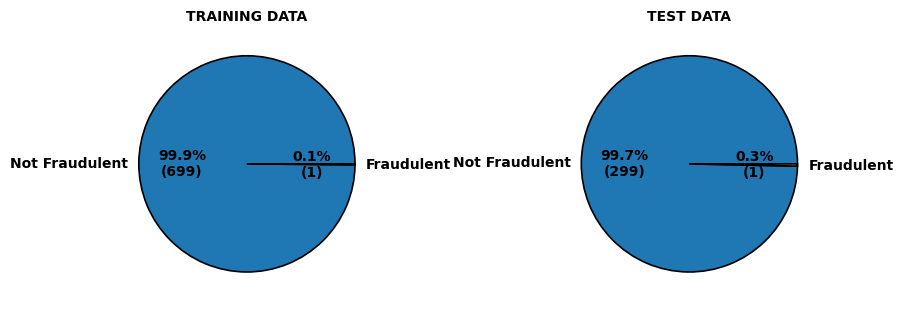

In [57]:
# confirm that our training and test sets contain similar distribution of
# outcomes so that they are representative of the original data set

# how can we set fraud to red and not fraud to green?


df_pct_train = y_train.value_counts().to_frame().rename(index = {0:'Not Fraudulent',
                                                                 1:'Fraudulent'})
df_pct_train = df_pct_train.rename(columns = {'y':'count'})

labels_train = df_pct_train.index.to_list()
values_train = df_pct_train.iloc[:,0]

df_pct_test = y_test.value_counts().to_frame().rename(index = {0:'Not Fraudulent',
                                                               1:'Fraudulent'})
df_pct_test = df_pct_test.rename(columns = {'y':'count'})

labels_test = df_pct_test.index.to_list()
values_test = df_pct_test.iloc[:,0]


fig,axes = plt.subplots(1,2,figsize = (9,4))

def autopct_fun(abs_values):
    gen = iter(abs_values)
    return lambda pct: f"{pct:.1f}%\n({next(gen)})"


axes[0].pie(x = values_train, labels = labels_train, autopct = autopct_fun(values_train),
            wedgeprops = {'linewidth':1.2, 'edgecolor':'black'},
            textprops = {'fontsize':10, 'fontweight':'bold'})
axes[0].set_title('TRAINING DATA', fontsize = 10, fontweight = 'bold', color = 'black')

axes[1].pie(x = values_test, labels = labels_test, autopct = autopct_fun(values_test),
            wedgeprops = {'linewidth':1.2, 'edgecolor':'black'},
            textprops = {'fontsize':10, 'fontweight':'bold'})
axes[1].set_title('TEST DATA', fontsize = 10, fontweight = 'bold', color = 'black')

fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.show()

#**5. TRAIN AND TEST CLASSIFICATION MODELS**

see which ones you like. Could also do a simple ANN

from sklearn.linear_model import LogisticRegression (good for binary classification)

decision tree is plain vanilla classifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import GaussianNB as NB (good for high dimension datasets)

In [58]:
# candidate models all set to our pre-defined SEED
LR = LogisticRegression(random_state = SEED)
DT = DecisionTreeClassifier(random_state = SEED)
RF = RandomForestClassifier(random_state = SEED)

models = {'Logistic_Regression':LR,
         'Decision_Tree':DT,
         'Random_Forest':RF}

#**for outcome comparisons also need to do ROC and AUC curves**

# when you run the next cell, be prepared for it to take a long time (i.e., over 10 minutes) we will have to address this during the presentation.  maybe run it for one test and continue on with stuff made prior to the presentation for the remainder.  The results should be the same, since we are using the same SEED throughout

logistic regression is fast.  decision tree took a few minutes and random forest will probably take almost 8 minutes

In [59]:
# We store the accuracy metric
accuracy_train = {}
accuracy_test = {}

# We store the recall metric
recall_train = {}
recall_test = {}

# We store the confusion matrix
cf_matrix_train = {}
cf_matrix_test = {}

# We store the classification report
clf_report_train = {}
clf_report_test = {}

for model_name, model in models.items():
    start = time.time()
    # Fit model
    model.fit(X_train_prep, y_train)
    end = time.time()
    print(f"* {model_name} => Total training time = {end-start}")
    # Predictions
    y_pred_train = model.predict(X_train_prep)
    y_pred_test = model.predict(X_test_prep)

    # Accuracy score
    accuracy_train[model_name] = accuracy_score(np.array(y_train), y_pred_train)
    accuracy_test[model_name] = accuracy_score(np.array(y_test), y_pred_test)

    # Recall score
    recall_train[model_name] = recall_score(np.array(y_train), y_pred_train)
    recall_test[model_name] = recall_score(np.array(y_test), y_pred_test)

    # Confusion Matrix
    cf_matrix_train[model_name] = confusion_matrix(np.array(y_train), y_pred_train)
    cf_matrix_test[model_name] = confusion_matrix(np.array(y_test), y_pred_test)

    # Classification Report
    clf_report_train[model_name] = classification_report(np.array(y_train), y_pred_train)
    clf_report_test[model_name] = classification_report(np.array(y_test), y_pred_test)



* Logistic_Regression => Total training time = 0.028616666793823242
* Decision_Tree => Total training time = 0.007127285003662109


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

* Random_Forest => Total training time = 0.22048497200012207


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **6. REPORT PERFORMANCE FOR EACH MODEL**

if ambitious do we want to try speed comparison for different number processing techniques??

In [60]:
# function to display the specific metrics on the same histogram
def plot_metric(metric_train:dict, metric_test:dict, metric_name:str):
    df_metric_train = pd.DataFrame.from_dict(metric_train, orient = 'index').rename(columns = {0:'Train'})
    df_metric_test = pd.DataFrame.from_dict(metric_test, orient = 'index').rename(columns = {0:'Test'})
    df_metric = pd.merge(df_metric_train, df_metric_test, left_index = True, right_index = True)
    df_metric = df_metric.sort_values(['Train', 'Test'], ascending = False)

    fig,ax = plt.subplots(figsize = (15, 6))
    n = len(df_metric.index)
    x = np.arange(n)
    width = 0.3

    rects1 = ax.bar(x = x-width, height = df_metric.iloc[:,0], width = width)
    rects2 = ax.bar(x = x, height = df_metric.iloc[:,1], width = width)
    ax.set_xticks(x-0.15, df_metric.index.to_list())
    ax.set_xlabel('Models', fontsize = 10, fontweight = 'bold', color = 'darkblue')
    ax.set_ylabel('Score', fontsize = 10, fontweight = 'bold', color = 'darkblue')
    ax.set_title(f'Metric of performance: {metric_name}', fontsize = 12, fontweight = 'bold', color = 'darkred')

    def autolabel(rects):
      for rect in rects:
        height = rect.get_height()
        ax.annotate(text = f'{round(height,5)}',
                    xy = (rect.get_x()+rect.get_width()/2, height),
                    xytext = (0,3),
                    textcoords = 'offset points',
                    ha = 'center',
                    va = 'bottom',
                    size = 8,
                    weight = 'bold',
                    color = 'black')

    autolabel(rects1)
    autolabel(rects2)
    ax.legend(["Train", "Test"])
    fig.show()

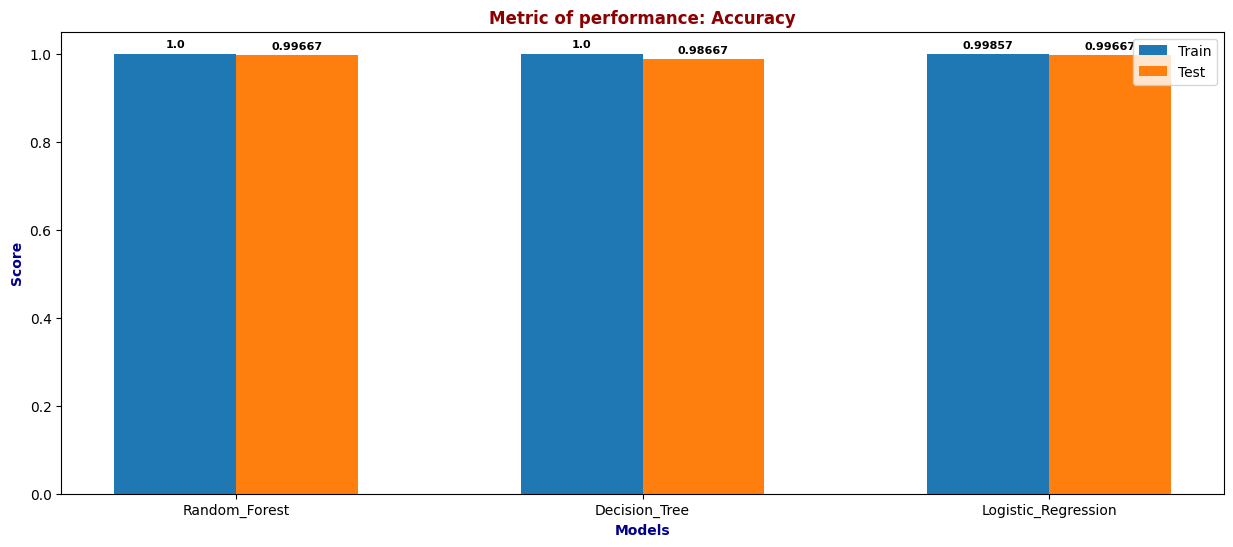

In [61]:
#================================== Accuracy =============================================
plot_metric(accuracy_train, accuracy_test, "Accuracy")

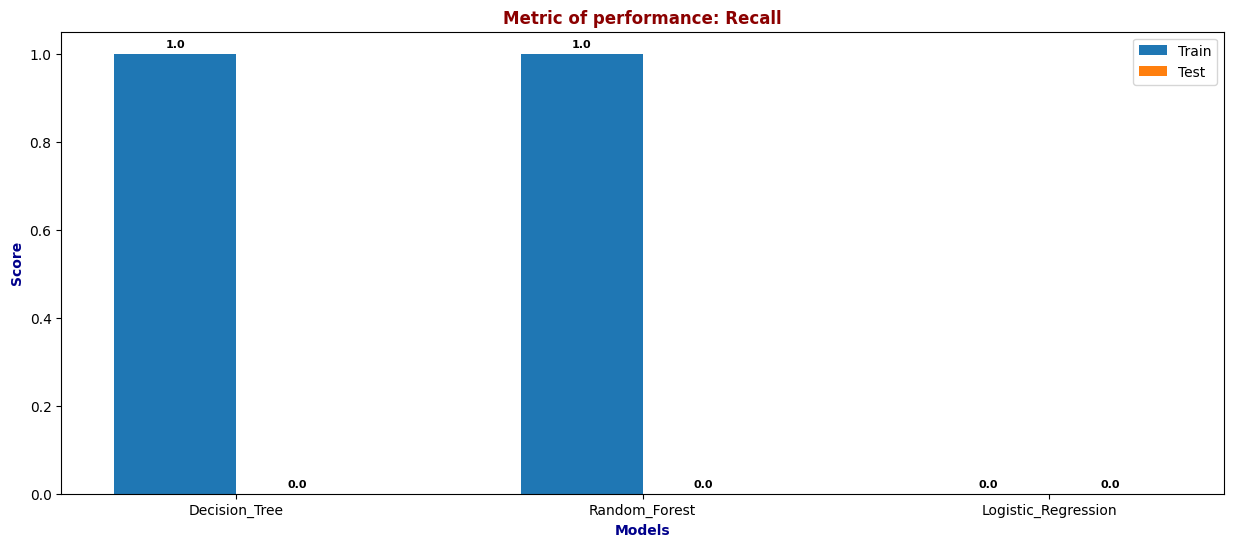

In [62]:
#==================================== Recall ============================================
plot_metric(recall_train, recall_test, "Recall")

In [63]:
## Confusion Matrix plot
def confusion_matrix_plot (cf_matrix_train,
                           cf_matrix_test,
                           classes:list)->None:

    """
    Function to plot the confusion matrices for the training and test set.

    Args:

      - cf_matrix_train(np.ndarray): confusion matrix of training set.
      - cf_matrix_test(np.ndarray): confusion matrix of testing set.
      - classes(list): list of containing the classes of the target variable.

    Return:
      - Confusion Matrix plots
    """

    # confusion matrices for training and testing
    confusion_train = cf_matrix_train
    confusion_test = cf_matrix_test

    # Calculate the percentages
    sum_train = np.sum(confusion_train, axis = 1)
    pct_train = confusion_train / sum_train[:,np.newaxis]*100

    sum_test = np.sum(confusion_test, axis = 1)
    pct_test = confusion_test / sum_test[:,np.newaxis]*100


    labels_train = [['{} \n({:.1f}%)'.format(val, pct) for val,pct in zip(row,pct_row)] for row, pct_row in zip(confusion_train, pct_train)]

    labels_test = [['{} \n({:.1f}%)'.format(val, pct) for val,pct in zip(row,pct_row)] for row, pct_row in zip(confusion_test, pct_test)]


    fig,axes = plt.subplots(1,2,figsize=(9,4))
    sns.heatmap(confusion_train,
                annot = np.array(labels_train),
                fmt = '',
                cmap = 'Blues',
                cbar = False,
                square = True,
                linewidths = 0.7,
                linecolor = 'white',
                ax = axes[0])
    sns.heatmap(confusion_test,
                annot = np.array(labels_test),
                fmt = '',
                cmap = 'Oranges',
                cbar = False,
                square = True,
                linewidths = 0.7,
                linecolor = 'white',
                ax = axes[1])
    # Add the texts TP, FN, FP, TN to the train matrix
    axes[0].text(0.5, 0.65, 'TN', ha='center', va='center', fontsize=9, fontweight='bold')
    axes[0].text(1.5, 0.65, 'FP', ha='center', va='center', fontsize=8, fontweight='bold')
    axes[0].text(0.5, 1.65, 'FN', ha='center', va='center', fontsize=8, fontweight='bold')
    axes[0].text(1.5, 1.65, 'TP', ha='center', va='center', fontsize=8, fontweight='bold')
    axes[0].set_title('Confusion Matrix Train',fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Predicted', fontsize=10, fontweight='bold')
    axes[0].set_ylabel('Real', fontsize=10, fontweight='bold')
    axes[0].set_xticklabels(classes)
    axes[0].set_yticklabels(classes)
    axes[0].tick_params(rotation=0, size = 8)

    # Add the texts TP, FN, FP, TN to the test matrix
    axes[1].text(0.5, 0.65, 'TN', ha='center', va='center', fontsize=9, fontweight='bold')
    axes[1].text(1.5, 0.65, 'FP', ha='center', va='center', fontsize=8, fontweight='bold')
    axes[1].text(0.5, 1.65, 'FN', ha='center', va='center', fontsize=8, fontweight='bold')
    axes[1].text(1.5, 1.65, 'TP', ha='center', va='center', fontsize=8, fontweight='bold')
    axes[1].set_title('Confusion Matrix Test',fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Predicted', fontsize=10, fontweight='bold')
    axes[1].set_ylabel('Real', fontsize=10, fontweight='bold')
    axes[1].set_xticklabels(classes)
    axes[1].set_yticklabels(classes)
    axes[1].tick_params(rotation=0, size = 8)

    fig.subplots_adjust(top=0.9)
    fig.tight_layout()
    plt.show()

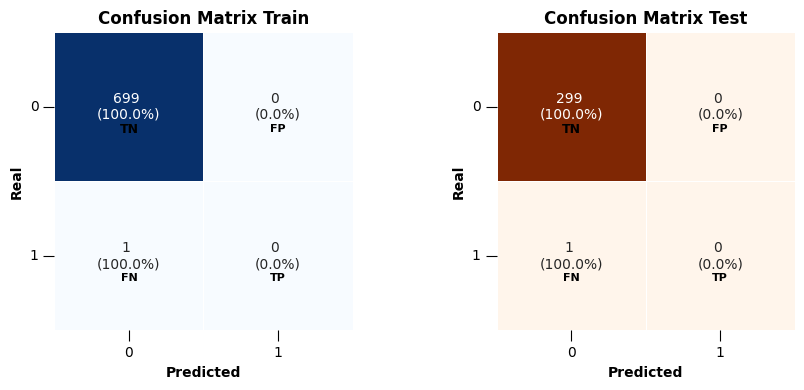

In [64]:
#================================= Logistic Regression =========================
confusion_matrix_plot(cf_matrix_train['Logistic_Regression'],
                      cf_matrix_test['Logistic_Regression'],
                      ["0","1"])

In [65]:
print("=="*30)
print(" "*15, "Classification Report Train")
print("=="*30)
print(clf_report_train["Logistic_Regression"])
print("=="*30)
print(" "*15, "Classification Report Test")
print("=="*30)
print(clf_report_test["Logistic_Regression"])

                Classification Report Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       699
           1       0.00      0.00      0.00         1

    accuracy                           1.00       700
   macro avg       0.50      0.50      0.50       700
weighted avg       1.00      1.00      1.00       700

                Classification Report Test
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       299
           1       0.00      0.00      0.00         1

    accuracy                           1.00       300
   macro avg       0.50      0.50      0.50       300
weighted avg       0.99      1.00      1.00       300



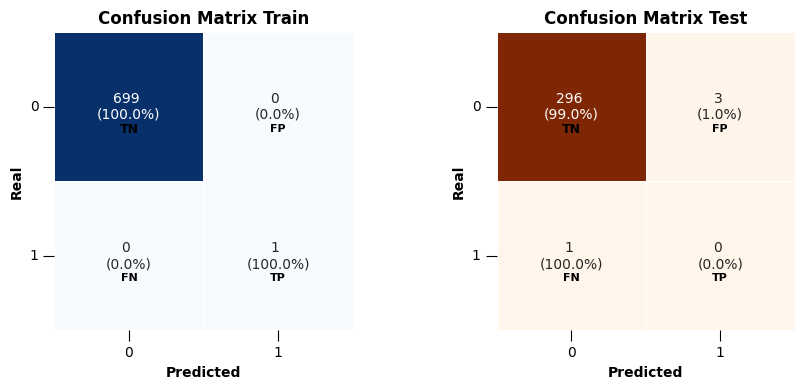

In [66]:
#================================= Decision Tree ================================
confusion_matrix_plot(cf_matrix_train['Decision_Tree'],
                      cf_matrix_test['Decision_Tree'],
                      ["0","1"])

In [67]:
print("=="*30)
print(" "*15, "Classification Report Train")
print("=="*30)
print(clf_report_train["Decision_Tree"])
print("=="*30)
print(" "*15, "Classification Report Test")
print("=="*30)
print(clf_report_test["Decision_Tree"])

                Classification Report Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       699
           1       1.00      1.00      1.00         1

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700

                Classification Report Test
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       299
           1       0.00      0.00      0.00         1

    accuracy                           0.99       300
   macro avg       0.50      0.49      0.50       300
weighted avg       0.99      0.99      0.99       300



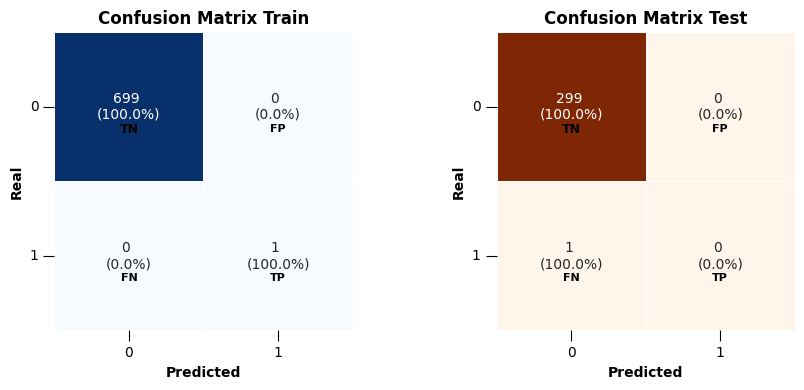

In [68]:
#================================= Random Forest ================================
confusion_matrix_plot(cf_matrix_train['Random_Forest'],
                      cf_matrix_test['Random_Forest'],
                      ["0","1"])

In [69]:
print("=="*30)
print(" "*15, "Classification Report Train")
print("=="*30)
print(clf_report_train["Random_Forest"])
print("=="*30)
print(" "*15, "Classification Report Test")
print("=="*30)
print(clf_report_test["Random_Forest"])

                Classification Report Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       699
           1       1.00      1.00      1.00         1

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700

                Classification Report Test
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       299
           1       0.00      0.00      0.00         1

    accuracy                           1.00       300
   macro avg       0.50      0.50      0.50       300
weighted avg       0.99      1.00      1.00       300



# **7. CONCLUSIONS AND SUMMARY**

logistic regression fastest but not as good on the performance metrics

decision tree good performance but takes a little longer

random forest has fantastic performance but also hella slow as coded right now

maybe we see if we can do random forest versus random forest but with some kind of tweek to provide parallel processing or instead of using numpy, use a more speedy library like numexpr
thoughts??

#**REFERENCES**

Kaggle data set web link

Notebooks/webpages for code examples?